<a href="https://colab.research.google.com/github/pachterlab/MBP_2023/blob/main/notebooks/OAS1_gene_expression_all_organs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

sns.set_context("poster")

In [50]:
# Read dataframe 
df = pd.read_csv('../files/oas1_expression_by_observation.csv.gz', index_col = 0)

In [86]:
# Read observation metadata
metadata = pd.read_csv('../files/observation_metadata.csv.gz', index_col = 0)
metadata.head()

,observation_id,cell_origin,experiment,technology,database_id
0,GSM2905292,brain organoid developmental stage: day 32 ste...,protocol: BMPa,10xv2,GSE108571
7981,GSM3665019,PBMCs,healthy donor,10xv2,GSE128066
11123,GSM4037981,retinal pigment epithelium macula unenriched,donor 1,10xv3,GSE135922
16446,GSM3773119,bronchial brushings,current smoker,celseq2,GSE131391
16453,GSM3439913,airway epithelial cells,differentiated in BEGM medium,10xv2,GSE121600


In [87]:
# Merge metadata
df_metadata = df.merge(metadata, left_on = 'observation', right_on = 'observation_id').drop(columns = ['observation_id'])
df_metadata.head()

,ENSG00000089127.13,organ,observation,cell_origin,experiment,technology,database_id
0,0.003914,brain,GSM2905290,brain organoid developmental stage: day 32 ste...,protocol: BMPi,10xv2,GSE108571
1,0.009888,brain,GSM2905291,brain organoid developmental stage: day 32 ste...,protocol: BMPi,10xv2,GSE108571
2,0.003339,brain,GSM2905292,brain organoid developmental stage: day 32 ste...,protocol: BMPa,10xv2,GSE108571
3,0.009456,brain,GSM2905293,brain organoid developmental stage: day 32 ste...,protocol: BMPa,10xv2,GSE108571
4,0.021212,brain,GSM3360833,human embryonic hippocampus,gestational week 16,10xv2,GSE119212


In [89]:
# Annotate covid infected samples
df_metadata["infected"] = ["infected" if "covid" in experiment else "healthy" for experiment in df_metadata.experiment]

In [90]:
# Beautify organ labels
organs = np.sort(df_metadata.organ.unique())
labels = np.unique([o.replace('_', ' ').capitalize() for o in organs])

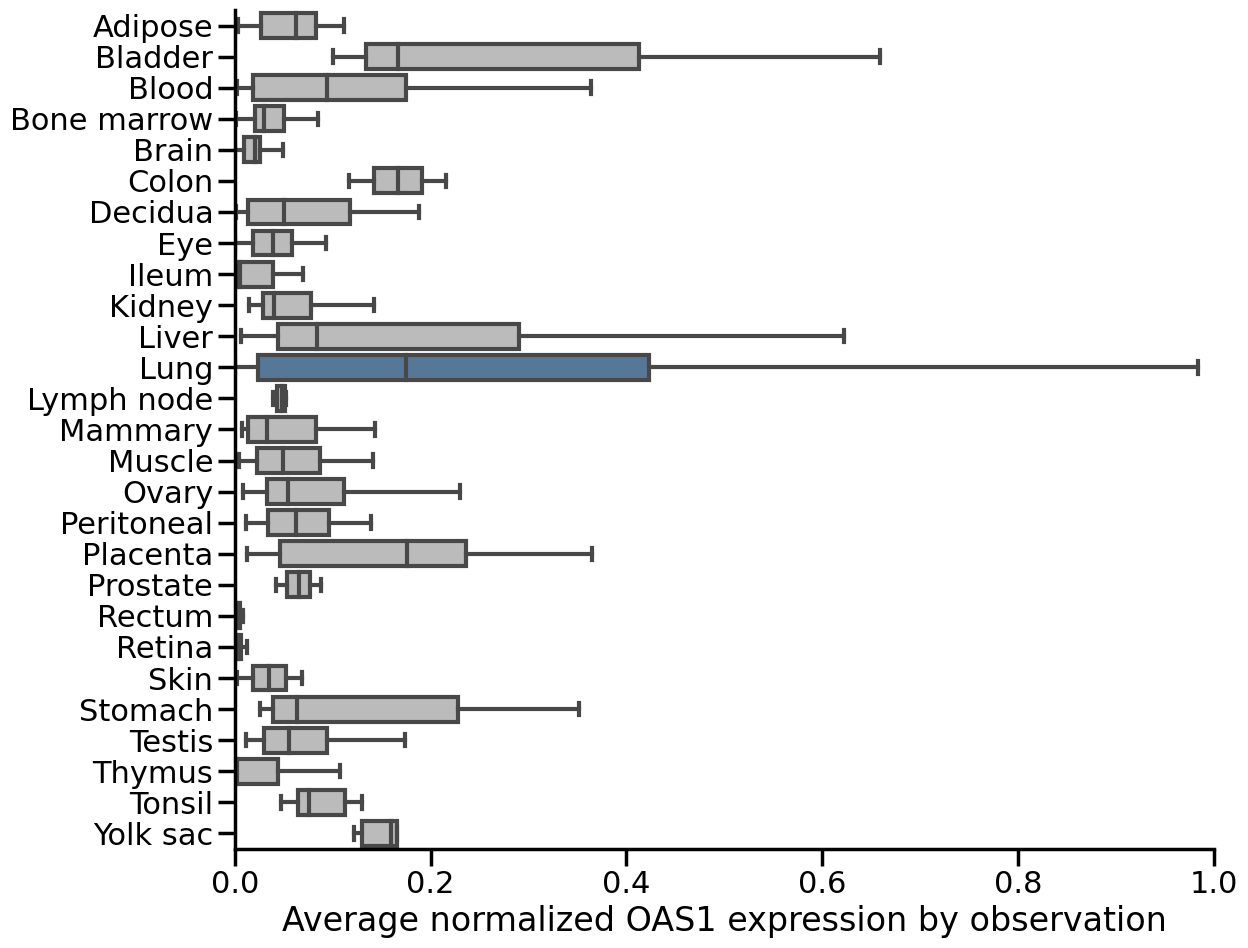

In [91]:
# Plot OAS1 gene expression by organ
fig, ax = plt.subplots(figsize = (13,10))
sns.boxplot(data = df_metadata, y = 'organ', x = 'ENSG00000089127.13', order = organs, palette = ['#BBBBBB' if o != "lung" else "#4C77A4" for o in organs],
           fliersize = 0)

ax.set_xlim(0,1)
ax.set_yticklabels(labels)
ax.set_ylabel('')
ax.set_xlabel('Average normalized OAS1 expression by observation')
plt.tight_layout()
sns.despine()

!mkdir -p figures
plt.savefig('figures/fig_2a.png')

### OAS1 expression in lung

In [92]:
lung_df = df_metadata.query('organ == "lung"')

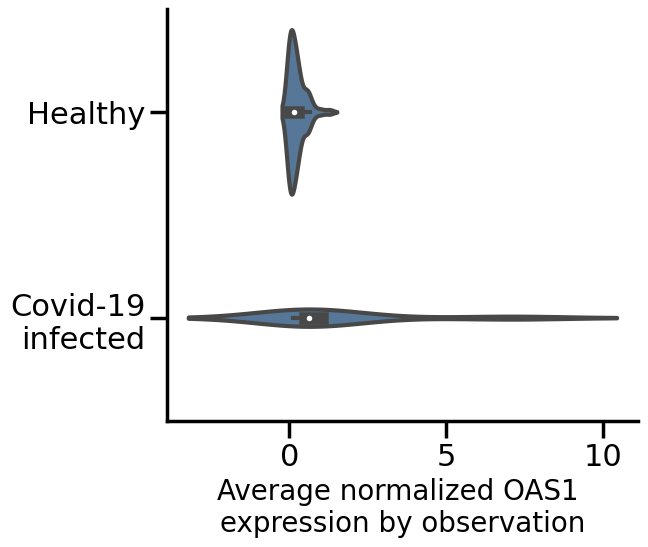

In [100]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (7,6))
sns.violinplot(data = lung_df, y = 'infected', x = 'ENSG00000089127.13', palette = ["#4C77A4", "#4C77A4"])
ax.set_xlabel('Average normalized OAS1 \nexpression by observation', fontsize = 20)
ax.set_ylabel('')
ax.set_yticklabels(['Healthy','Covid-19\ninfected'])
sns.despine()
fig.tight_layout()
!mkdir -p figures
plt.savefig('figures/fig_2b.png')

One COVID-19 observation has very high OAS1 expression. We can re-plot the results without the outlier to confirm that it is not driving this result

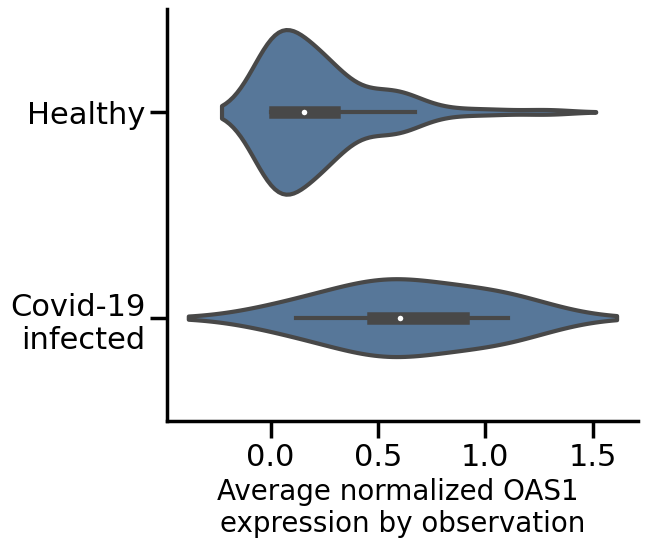

In [102]:
# Without outlier
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (7,6))
sns.violinplot(data = lung_df.iloc[:-1,:], y = 'infected', x = 'ENSG00000089127.13', palette = ["#4C77A4", "#4C77A4"])
ax.set_xlabel('Average normalized OAS1 \nexpression by observation', fontsize = 20)
ax.set_ylabel('')
ax.set_yticklabels(['Healthy','Covid-19\ninfected'])
sns.despine()
fig.tight_layout()
#plt.savefig('oas1_gene_exp_lung_by_infection_no_outlier.png')